In [7]:
import h5py
import scanpy as sc
import numpy as np
import pandas as pd

In [23]:
def read_data(path):
    adata = sc.read_h5ad(path)
    return adata
    
def compute_pseudobulk(adata, id_tag):
    # TODO: Make this faster for large datasets
    adata.layers['norm'] = np.expm1(adata.layers['lognorm'].toarray())
    
    pseudobulk = pd.DataFrame(columns=adata.var_names, index=adata.obs[id_tag].unique())                                                                                                 

    for id_i in pseudobulk.index: 
        pseudobulk.loc[id_i] = adata[adata.obs[id_tag]==id_i,:].layers['norm'].mean(0)
    bulklognorm = np.log1p(pseudobulk.values.astype('float'))
    
    bln_adata = sc.AnnData(X=pseudobulk, obsm={'lognorm': bulklognorm}, dtype=np.float32)    
    bln_adata.obs = adata.obs[['pre_or_post','response',id_tag]].drop_duplicates()
    
    #new colors
    bln_adata.uns['pre_or_post_colors'] = ['navy', 'coral']
    bln_adata.uns['response_colors'] = ['darkorchid', 'skyblue']
    
    return bln_adata

def plot_umap(bln_adata):    
    sc.pp.neighbors(bln_adata, use_rep='lognorm', n_neighbors=10, n_pcs=20)
    sc.tl.umap(bln_adata)    
    sc.pl.umap(bln_adata,color=['pre_or_post','response'])
    

/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


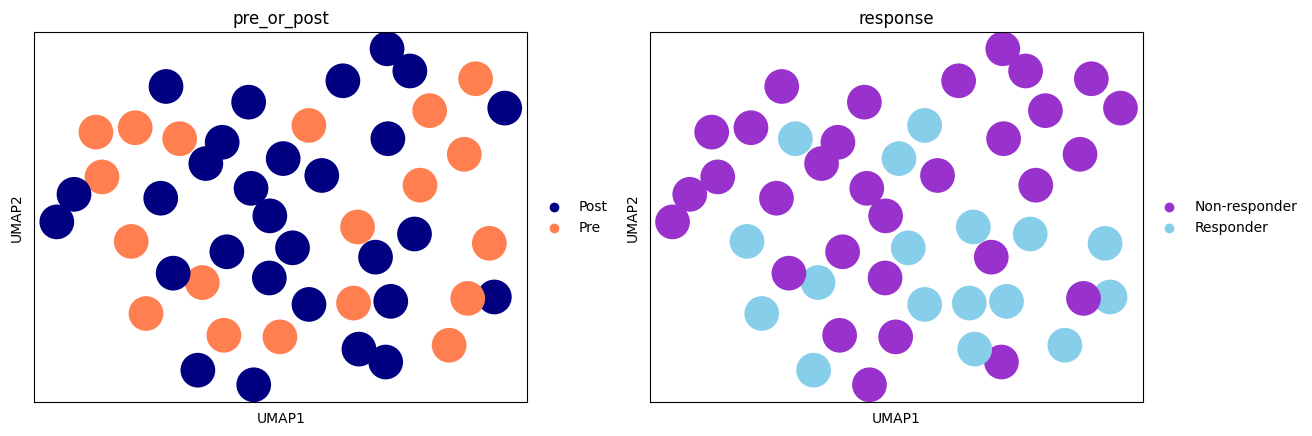

In [24]:
# Visualize real Sade Feldman data
adata = read_data('/localdata/rna_rep_learning/sadefeldman/sadefeldman_adata_2.h5ad')
bln_adata = compute_pseudobulk(adata,'pid')
plot_umap(bln_adata)

/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/rpeyser/envs/scset/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


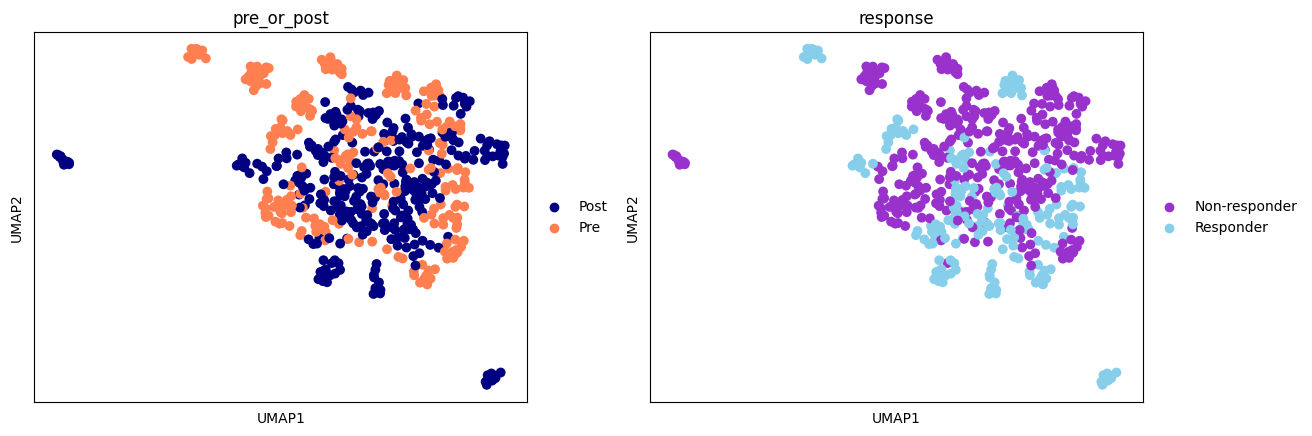

In [25]:
# Visualize synthetic Sade Feldman data
adata = read_data('/localdata/rna_rep_learning/sadefeldman/synthetic_data/syn_adata_noised_std_0.7261.h5ad')
bln_adata = compute_pseudobulk(adata,'syn_pid')
plot_umap(bln_adata)

# old synthetic data scheme - creating based on 4 pools of patients

/opt/conda/nmsingh/envs/sc_set_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/conda/nmsingh/envs/sc_set_env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/nmsingh/envs/sc_set_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/nmsingh/envs/sc_set_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


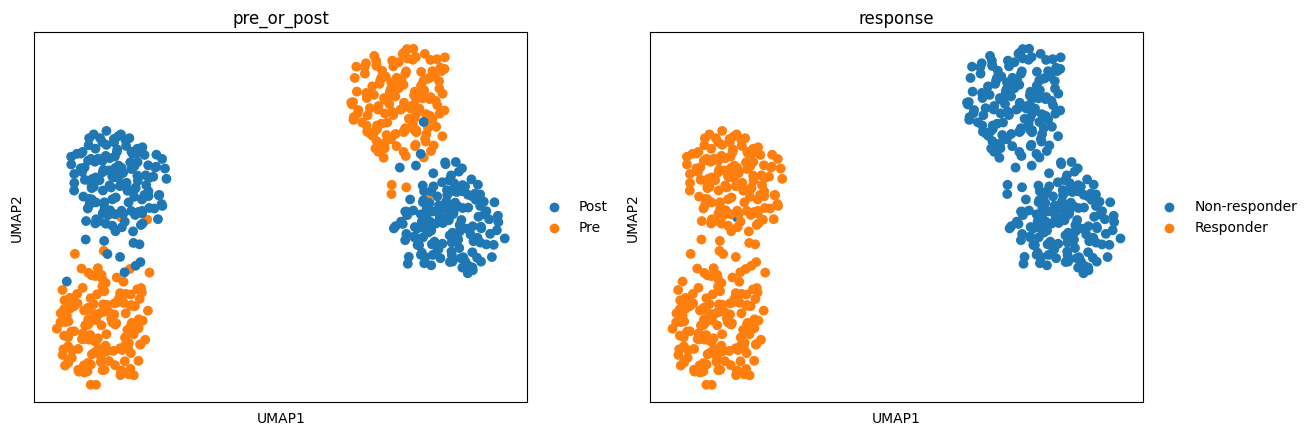

In [4]:
# Visualize synthetic Sade Feldman data
adata = read_data('/localdata/rna_rep_learning/sadefeldman/synthetic_data/synthetic_adata.h5ad')
bln_adata = compute_pseudobulk(adata,'synthetic_pid')
plot_umap(bln_adata)